# Import Module

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data

In [ ]:
data = pd.read_csv('Cleaned_Data.csv')
data.head()

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan
0,Eugene Jollyn Chen,SD,5,14,6,10,Visual
1,Angaline Valerie Bong,SD,6,12,16,14,Audio
2,Morgan Moen,SMP,9,13,15,17,Kinestetik
3,Chloe Utomo,SD,6,14,10,12,Visual
4,Jocelyn Quinn,SD,6,14,19,12,Audio


In [ ]:
X = data.iloc[:,3:5].values

# Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

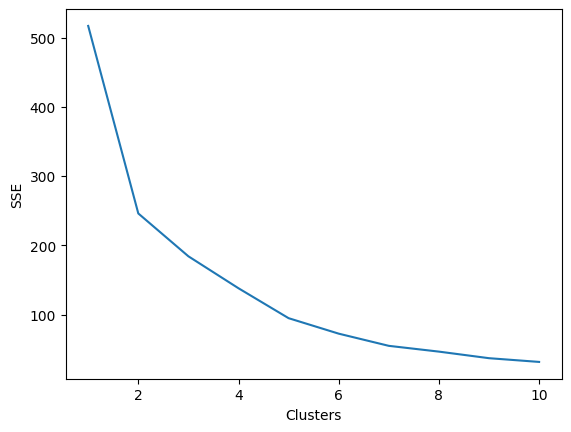

In [ ]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

Dilihat dari elbow shape, jumlah clusternya paling optimumnya 2 (akan dicoba juga dengan k = 5)

# k = 5

In [ ]:
# k = 5
k_means_optimum = KMeans(n_clusters = 5, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)
print(y)

[3 1 1 3 4 0 3 0 3 0 4 3 3 3 0 2 1 1 3 1 2 2 1 1 0 3 4 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['cluster'] = y
# the above step adds extra column indicating the cluster number for each country

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
data5 = data[data.cluster==4]

In [ ]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))
print(len(data5))

5
10
3
9
3


In [ ]:
data1

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan,cluster
5,Brenard,SMP,9,9,10,14,Kinestetik,0
7,Tobias,SMP,9,10,9,14,Kinestetik,0
9,Jordan Yang,SD,6,8,9,7,Audio,0
14,Dustin mackenzie purnomo,SMP,7,11,11,14,Kinestetik,0
24,Bryan,SMA,10,11,12,12,Audio,0


In [ ]:
data2

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan,cluster
1,Angaline Valerie Bong,SD,6,12,16,14,Audio,1
2,Morgan Moen,SMP,9,13,15,17,Kinestetik,1
16,Jessica Vanessia,SMP,8,13,13,11,Visual Audio,1
17,Mikaela Kaitlyn Jo,SMP,8,13,14,9,Audio,1
19,Grace,SMA,11,11,17,14,Audio,1
22,Nadya Valencia,SMA,11,14,14,15,Kinestetik,1
23,Jovan Ethan Santoso,SMP,8,14,15,18,Kinestetik,1
27,Ophelia,SMP,8,14,13,16,Kinestetik,1
28,Richelle,SD,6,13,17,16,Audio,1
29,Jayson,SD,6,11,16,9,Audio,1


In [ ]:
data3

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan,cluster
15,Jose Benedict Ng,SMP,8,16,11,12,Visual,2
20,Juliya tri wahyuni,SMA,10,17,14,15,Visual,2
21,Valencia,SMA,12,19,12,15,Visual,2


In [ ]:
data4

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan,cluster
0,Eugene Jollyn Chen,SD,5,14,6,10,Visual,3
3,Chloe Utomo,SD,6,14,10,12,Visual,3
6,Moses Moen,SMP,8,12,8,7,Visual,3
8,Mattias Calix Limena,SD,6,14,11,9,Visual,3
11,Nicolle Victoria Othman,SMP,8,13,8,14,Kinestetik,3
12,Jonathan Kho,SD,6,13,11,9,Visual,3
13,Autumn Eirene Tristanlyn,SD,6,13,10,14,Kinestetik,3
18,Stanley Lim,SMA,12,12,10,13,Kinestetik,3
25,Muhamad Gibran Al Havitz,SMA,10,15,9,13,Visual,3


In [ ]:
data5

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan,cluster
4,Jocelyn Quinn,SD,6,14,19,12,Audio,4
10,Wilson Chen,SMP,7,16,17,17,Audio Kinestetik,4
26,Jolie Yang,SMA,11,18,19,15,Audio,4


## Visualisasi

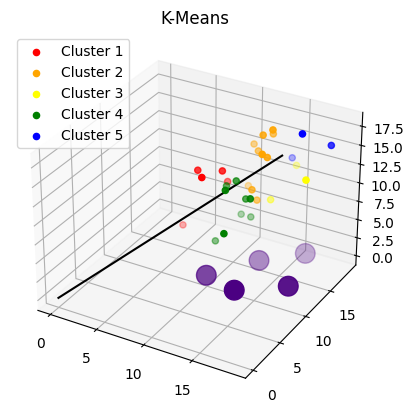

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1.visual, data1.auditotial, data1.kinestetik, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.visual, data2.auditotial, data2.kinestetik, c='orange', label = 'Cluster 2')
kplot.scatter3D(data3.visual, data3.auditotial, data3.kinestetik, c='yellow', label = 'Cluster 3')
kplot.scatter3D(data4.visual, data4.auditotial, data4.kinestetik, c='green', label = 'Cluster 4')
kplot.scatter3D(data5.visual, data5.auditotial, data5.kinestetik, c='blue', label = 'Cluster 5')

plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("K-Means")
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y)
print(score)

0.39194656701074054


# k = 2

In [ ]:
# k = 2
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)
print(y)

[0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['cluster'] = y
# The above step adds extra column indicating the cluster number for each country

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]

In [ ]:
print(len(data1))
print(len(data2))

15
15


In [ ]:
data1

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan,cluster
0,Eugene Jollyn Chen,SD,5,14,6,10,Visual,0
3,Chloe Utomo,SD,6,14,10,12,Visual,0
5,Brenard,SMP,9,9,10,14,Kinestetik,0
6,Moses Moen,SMP,8,12,8,7,Visual,0
7,Tobias,SMP,9,10,9,14,Kinestetik,0
8,Mattias Calix Limena,SD,6,14,11,9,Visual,0
9,Jordan Yang,SD,6,8,9,7,Audio,0
11,Nicolle Victoria Othman,SMP,8,13,8,14,Kinestetik,0
12,Jonathan Kho,SD,6,13,11,9,Visual,0
13,Autumn Eirene Tristanlyn,SD,6,13,10,14,Kinestetik,0


In [ ]:
data2

,nama,jenjang,kelas,visual,auditotial,kinestetik,kecenderungan,cluster
1,Angaline Valerie Bong,SD,6,12,16,14,Audio,1
2,Morgan Moen,SMP,9,13,15,17,Kinestetik,1
4,Jocelyn Quinn,SD,6,14,19,12,Audio,1
10,Wilson Chen,SMP,7,16,17,17,Audio Kinestetik,1
16,Jessica Vanessia,SMP,8,13,13,11,Visual Audio,1
17,Mikaela Kaitlyn Jo,SMP,8,13,14,9,Audio,1
19,Grace,SMA,11,11,17,14,Audio,1
20,Juliya tri wahyuni,SMA,10,17,14,15,Visual,1
21,Valencia,SMA,12,19,12,15,Visual,1
22,Nadya Valencia,SMA,11,14,14,15,Kinestetik,1


## Visualisasi

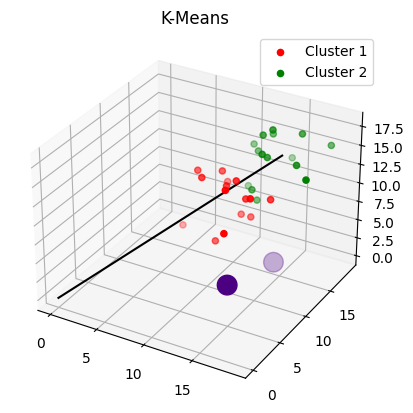

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.visual, data1.auditotial, data1.kinestetik, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.visual, data2.auditotial, data2.kinestetik, c='green', label = 'Cluster 2')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("K-Means")
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y)
print(score)

0.4318281136887421


# Notes:

Data paling optimal menggunakan k = 2